<h2 style="text-align: center; text-decoration: underline">Students Performance Analysis</h2>

In [4]:
#Requirements for the file
#Run the cell once
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3 style="font-weight: bold">1. Basic Exploratory Analysis</h3>
<ul>
    <li>What's the overall distribution of math, reading, and writing scores?</li>
    <li>How many students are in each gender, race/ethnicity, and parental education group?</li>
    <li>What percentage of students received free/reduced lunch?</li>
</ul>


In [5]:
#Load the data into a dataframe
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


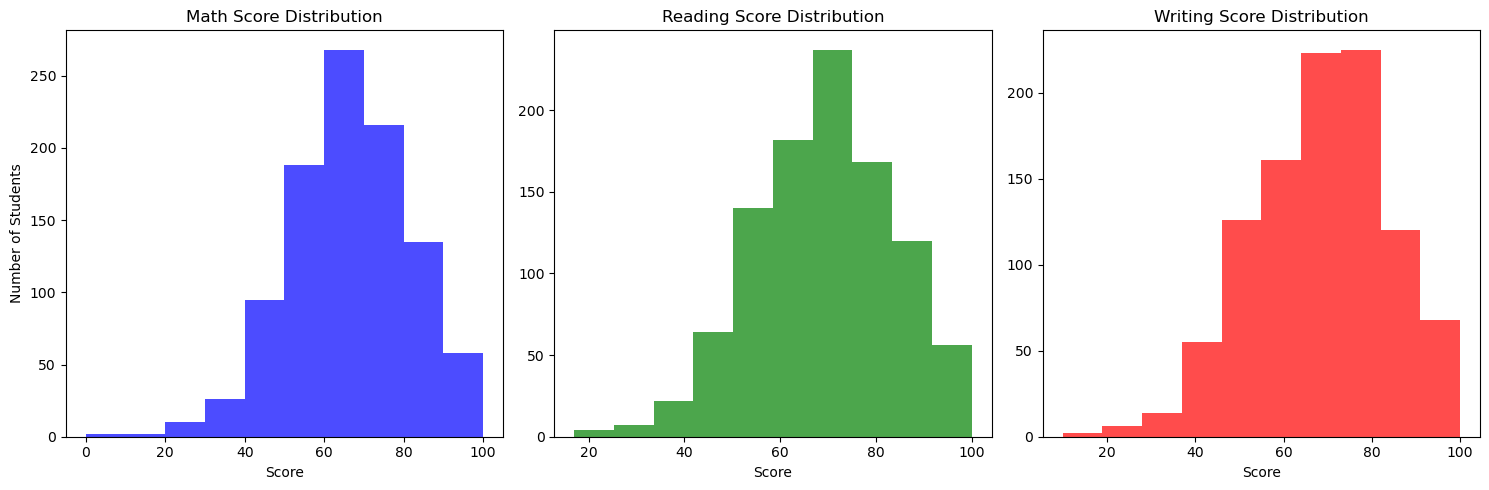

In [6]:
#Overall distribution of math, reading, and writing score
# Visualize the distribution of scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df["math score"], bins=10, color='blue', alpha=0.7)
plt.title('Math Score Distribution')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.subplot(1, 3, 2)
plt.hist(df["reading score"], bins=10, color='green', alpha=0.7)
plt.title('Reading Score Distribution')
plt.xlabel('Score')

plt.subplot(1, 3, 3)
plt.hist(df["writing score"], bins=10, color='red', alpha=0.7)
plt.title('Writing Score Distribution')
plt.xlabel('Score')

plt.tight_layout()
plt.show()



In [81]:
#Total number of students in each gender
genders = df["gender"].unique()
print(f"{genders}\n")

females = (df["gender"] == "female").sum()
males = (df["gender"] == "male").sum()
print("Gender distribution: ")
print(f"females = {females}")
print(f"males = {males}")

#Total number of students in each ethnicity
ethnicity = df["race/ethnicity"].unique()
print("\nEthnicity distribution: ")
for group in ethnicity:
    total_number = (df["race/ethnicity"] == group).sum()
    print(f"{group} = {total_number}")

#Total number of students in each parental education group
parental_education = df["parental level of education"].unique()
print(f"\nParental level of education distribution: ")
for level in parental_education:
    total_number = (df["parental level of education"] == level).sum()
    print(f"{level} = {total_number}")
    
#Percentage of students receiving free/reduced lunch
free_reduced = (df["lunch"] == "free/reduced").sum()
percentage = (free_reduced / len(df["lunch"])) * 100
print(f"\nPercentage of students receiving free/reduced lunch = {percentage}")

['female' 'male']

Gender distribution: 
females = 518
males = 482

Ethnicity distribution: 
group B = 190
group C = 319
group A = 89
group D = 262
group E = 140

Parental level of education distribution: 
bachelor's degree = 118
some college = 226
master's degree = 59
associate's degree = 222
high school = 196
some high school = 179

Percentage of students receiving free/reduced lunch = 35.5
